In [94]:
library(ggplot2)

In [95]:
bb = read.table('babies.txt', header=1)
# remove first obvious outliers
bb <- bb[bb$smoke!=9,]
bb <- bb[bb$weight<750,]
bb <- bb[bb$height<75,]
bb <- bb[bb$age<50,]
bb <- bb[bb$gestation<500,]

In [47]:
# split data into non-smokers and smokers
ns<-bb[bb$smoke==0,]
s<-bb[bb$smoke==1,]

In [89]:
# filter smokers and non-smokers by 'box whisker' method
Q1 = summary(ns$weight)['1st Qu.']
Q3 = summary(ns$weight)['3rd Qu.']
IQR = Q3-Q1
min_cutoff = Q1 - (1.5*IQR)
max_cutoff = Q3 + (1.5*IQR)
ns<-ns[ns$weight > min_cutoff, ]
ns<-ns[ns$weight < max_cutoff, ]

Q1 = summary(s$weight)['1st Qu.']
Q3 = summary(s$weight)['3rd Qu.']
IQR = Q3-Q1
min_cutoff = Q1 - (1.5*IQR)
max_cutoff = Q3 + (1.5*IQR)
s<-s[s$weight > min_cutoff, ]
s<-s[s$weight < max_cutoff, ]

In [117]:
cat("non-smoker\n")
cat("mean", mean(ns$weight), '\n')
cat("sd", sd(ns$weight), '\n')
cat("smoker\n")
cat("mean", mean(s$weight), '\n')
cat("sd", sd(s$weight))

non-smoker
mean 126.8061 
sd 16.62955 
smoker
mean 124.69 
sd 16.59375

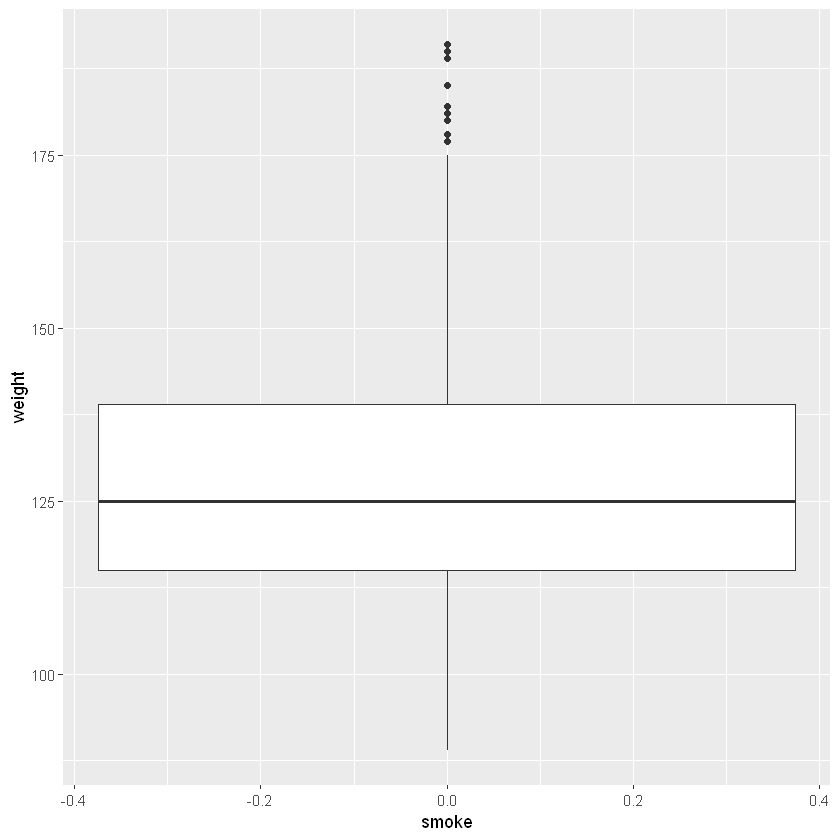

In [85]:
ggplot(ns, aes(x=smoke, y=weight, group=smoke)) + geom_boxplot()